In [517]:
!pip3 install scikit-learn --upgrade --quiet

In [518]:
!pip3 install opendatasets --upgrade --quiet

In [519]:
import opendatasets as od
od.version()

'0.1.22'

In [520]:
dataset_url = 'https://www.kaggle.com/jsphyg/weather-dataset-rattle-package'

In [521]:
od.download(dataset_url)

Skipping, found downloaded files in "./weather-dataset-rattle-package" (use force=True to force download)


In [522]:
import os

In [523]:
data_dir = './weather-dataset-rattle-package'

In [524]:
os.listdir(data_dir)

['weatherAUS.csv']

In [525]:
train_csv = data_dir + '/weatherAUS.csv'

In [526]:
!pip install pandas --quiet

In [527]:
import pandas as pd

In [528]:
raw_df = pd.read_csv(train_csv)

In [529]:
raw_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ...        71.0   
1            NaN         WNW           44.0        NNW  ...        44.0   
2            NaN         WSW           46.0          W  ...        38.0   
3            NaN          NE           24.0         SE  ...        45.0   
4            NaN           W           41.0        ENE  ...        82.0   
...          ...         ...            ...        ...  ...         ...   
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   
145459       NaN         NaN            NaN        ESE  ...        62.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0              22.0       1007.7       1007.1       8.0       NaN     16.9   
1              25.0       1010.6       1007.8       NaN       NaN     17.2   
2              30.0       1007.6       1008.7       NaN       2.0     21.0   
3              16.0       1017.6       1012.8       NaN       NaN     18.1   
4              33.0       1010.8       1006.0       7.0       8.0     17.8   
...             ...          ...          ...       ...       ...      ...   
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   
145459         36.0       1020.2       1017.9       8.0       8.0     15.0   

        Temp3pm  RainToday  RainTomorrow  
0          21.8         No            No  
1          24.3         No            No  
2          23.2         No            No  
3          26.5         No            No  
4          29.7         No            No  
...         ...        ...           ...  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  
145459     20.9         No           NaN  

[145460 rows x 23 columns]

In [530]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [531]:
raw_df.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True)

In [532]:
!pip3 install plotly matplotlib seaborn --quiet

In [533]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [534]:
px.histogram(raw_df, x='Location', title='Location vs. Rainy Days', color='RainToday')

In [535]:
px.histogram(raw_df, 
             x='Temp3pm', 
             title='Temperature at 3 pm vs. Rain Tomorrow', 
             color='RainTomorrow')

In [536]:
px.histogram(raw_df, 
             x='RainTomorrow', 
             color='RainToday', 
             title='Rain Tomorrow vs. Rain Today')

In [537]:
px.scatter(raw_df.sample(2000), 
           title='Min Temp. vs Max Temp.',
           x='MinTemp', 
           y='MaxTemp', 
           color='RainToday')

In [538]:
px.scatter(raw_df.sample(2000), 
           title='Temp (3 pm) vs. Humidity (3 pm)',
           x='Temp3pm',
           y='Humidity3pm',
           color='RainTomorrow')

In [539]:
use_sample = False

In [540]:
sample_fraction = 0.1

In [541]:
if use_sample:
    raw_df = raw_df.sample(frac=sample_fraction).copy()

In [542]:
!pip install scikit-learn --upgrade --quiet

In [543]:
from sklearn.model_selection import train_test_split

In [544]:
train_and_val_df, test_df = train_test_split(raw_df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_and_val_df, test_size=0.25, random_state=42)

In [545]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (84471, 23)
val_df.shape : (28158, 23)
test_df.shape : (28158, 23)


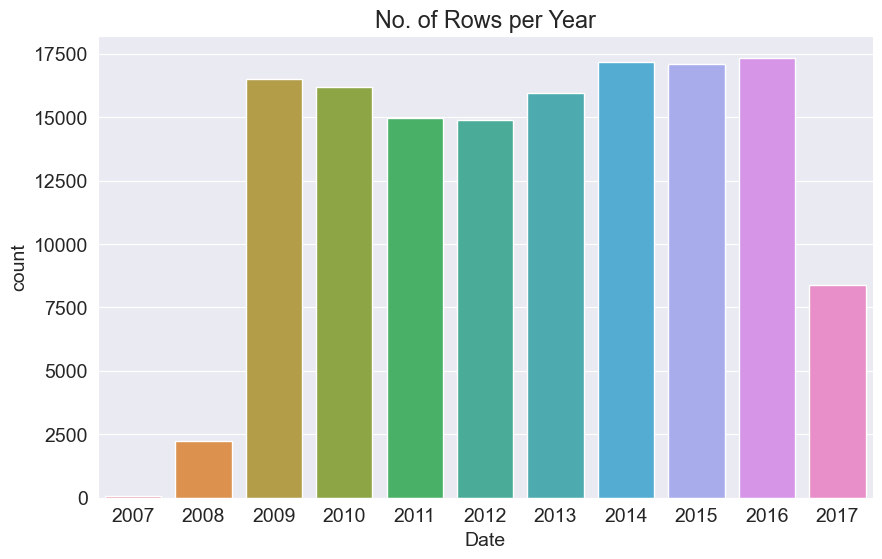

In [546]:
plt.title('No. of Rows per Year')
sns.countplot(x=pd.to_datetime(raw_df.Date).dt.year);

In [547]:
year = pd.to_datetime(raw_df.Date).dt.year

train_df = raw_df[year < 2015]
val_df = raw_df[year == 2015]
test_df = raw_df[year > 2015]

In [548]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (97988, 23)
val_df.shape : (17089, 23)
test_df.shape : (25710, 23)


In [549]:
train_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
144548  2014-12-27    Uluru     16.9     33.2       0.0          NaN   
144549  2014-12-28    Uluru     15.1     36.8       0.0          NaN   
144550  2014-12-29    Uluru     17.3     37.8       0.0          NaN   
144551  2014-12-30    Uluru     20.1     38.5       0.0          NaN   
144552  2014-12-31    Uluru     22.5     39.6       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ...        71.0   
1            NaN         WNW           44.0        NNW  ...        44.0   
2            NaN         WSW           46.0          W  ...        38.0   
3            NaN          NE           24.0         SE  ...        45.0   
4            NaN           W           41.0        ENE  ...        82.0   
...          ...         ...            ...        ...  ...         ...   
144548       NaN         SSE           43.0        ESE  ...        22.0   
144549       NaN          NE           31.0        ENE  ...        16.0   
144550       NaN         ESE           39.0        ESE  ...        15.0   
144551       NaN         ESE           43.0        ESE  ...        22.0   
144552       NaN         WNW           76.0        ENE  ...        16.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0              22.0       1007.7       1007.1       8.0       NaN     16.9   
1              25.0       1010.6       1007.8       NaN       NaN     17.2   
2              30.0       1007.6       1008.7       NaN       2.0     21.0   
3              16.0       1017.6       1012.8       NaN       NaN     18.1   
4              33.0       1010.8       1006.0       7.0       8.0     17.8   
...             ...          ...          ...       ...       ...      ...   
144548         13.0       1014.1       1009.8       NaN       NaN     23.7   
144549          8.0       1012.6       1007.6       NaN       NaN     28.9   
144550          8.0       1011.9       1008.0       NaN       NaN     29.7   
144551          9.0       1014.0       1009.2       NaN       NaN     29.8   
144552          9.0       1012.1       1006.2       NaN       NaN     30.1   

        Temp3pm  RainToday  RainTomorrow  
0          21.8         No            No  
1          24.3         No            No  
2          23.2         No            No  
3          26.5         No            No  
4          29.7         No            No  
...         ...        ...           ...  
144548     31.8         No            No  
144549     34.8         No            No  
144550     35.7         No            No  
144551     37.2         No            No  
144552     37.4         No            No  

[97988 rows x 23 columns]

In [550]:
val_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
2133    2015-01-01   Albury     11.4     33.5       0.0          NaN   
2134    2015-01-02   Albury     15.5     39.6       0.0          NaN   
2135    2015-01-03   Albury     17.1     38.3       0.0          NaN   
2136    2015-01-04   Albury     26.0     33.1       0.0          NaN   
2137    2015-01-05   Albury     19.0     35.2       0.0          NaN   
...            ...      ...      ...      ...       ...          ...   
144913  2015-12-27    Uluru     20.5     34.7       0.0          NaN   
144914  2015-12-28    Uluru     18.0     36.4       0.0          NaN   
144915  2015-12-29    Uluru     17.5     37.1       0.0          NaN   
144916  2015-12-30    Uluru     20.0     38.9       0.0          NaN   
144917  2015-12-31    Uluru     19.3     37.4       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
2133         NaN         WSW           30.0        ESE  ...        45.0   
2134         NaN          NE           56.0        ESE  ...        45.0   
2135         NaN         NNE           48.0         NE  ...        35.0   
2136         NaN         NNE           41.0        ESE  ...        46.0   
2137         NaN           E           33.0        SSE  ...        60.0   
...          ...         ...            ...        ...  ...         ...   
144913       NaN           E           52.0        ESE  ...        23.0   
144914       NaN         ESE           54.0          E  ...        17.0   
144915       NaN           E           56.0          E  ...        12.0   
144916       NaN           E           59.0          E  ...        12.0   
144917       NaN          SE           56.0        ESE  ...        46.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
2133           14.0       1013.5       1011.0       NaN       NaN     21.0   
2134           12.0       1016.0       1012.4       NaN       NaN     25.6   
2135           19.0       1017.9       1012.3       NaN       NaN     29.2   
2136           37.0       1013.6       1012.1       8.0       5.0     27.4   
2137           34.0       1017.4       1014.7       8.0       NaN     25.6   
...             ...          ...          ...       ...       ...      ...   
144913         12.0       1013.2       1010.1       NaN       NaN     24.3   
144914          7.0       1014.7       1010.9       NaN       NaN     26.7   
144915          7.0       1012.6       1007.5       NaN       NaN     28.1   
144916         12.0       1007.2       1002.6       NaN       1.0     31.3   
144917         18.0       1007.3       1003.7       NaN       NaN     25.8   

        Temp3pm  RainToday  RainTomorrow  
2133       32.7         No            No  
2134       38.2         No            No  
2135       37.0         No            No  
2136       30.9         No            No  
2137       32.5         No            No  
...         ...        ...           ...  
144913     33.0         No            No  
144914     35.0         No            No  
144915     34.7         No            No  
144916     38.4         No            No  
144917     35.8         No            No  

[17089 rows x 23 columns]

In [551]:
test_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
2498    2016-01-01   Albury     20.4     37.6       0.0          NaN   
2499    2016-01-02   Albury     20.9     33.6       0.4          NaN   
2500    2016-01-03   Albury     18.4     23.1       2.2          NaN   
2501    2016-01-04   Albury     17.3     23.7      15.6          NaN   
2502    2016-01-05   Albury     15.5     22.9       6.8          NaN   
...            ...      ...      ...      ...       ...          ...   
145454  2017-06-20    Uluru      3.5     21.8       0.0          NaN   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
2498         NaN         ENE           54.0        NaN  ...        46.0   
2499         NaN         SSE           50.0        SSE  ...        54.0   
2500         NaN         ENE           48.0        ESE  ...        62.0   
2501         NaN         SSE           39.0         SE  ...        74.0   
2502         NaN         ENE           31.0         SE  ...        92.0   
...          ...         ...            ...        ...  ...         ...   
145454       NaN           E           31.0        ESE  ...        59.0   
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
2498           17.0       1013.4       1009.2       7.0       3.0     26.1   
2499           30.0       1011.1       1008.4       8.0       8.0     24.8   
2500           67.0       1014.0       1014.8       8.0       8.0     21.8   
2501           65.0       1017.9       1016.5       8.0       8.0     19.2   
2502           63.0       1016.3       1013.9       8.0       8.0     17.2   
...             ...          ...          ...       ...       ...      ...   
145454         27.0       1024.7       1021.2       NaN       NaN      9.4   
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   

        Temp3pm  RainToday  RainTomorrow  
2498       36.7         No            No  
2499       31.7         No           Yes  
2500       19.5        Yes           Yes  
2501       21.6        Yes           Yes  
2502       22.2        Yes            No  
...         ...        ...           ...  
145454     20.9         No            No  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  

[25710 rows x 23 columns]

In [552]:
input_cols = list(train_df.columns)[1:-1] # kolon listenin ilk elemanından sonraki elemanında son elemanından öncekine kadar  
target_col = 'RainTomorrow'

In [553]:
print(input_cols)

['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']


In [554]:
target_col

'RainTomorrow'

In [555]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [556]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [557]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [558]:
train_inputs

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0        Albury     13.4     22.9       0.6          NaN       NaN   
1        Albury      7.4     25.1       0.0          NaN       NaN   
2        Albury     12.9     25.7       0.0          NaN       NaN   
3        Albury      9.2     28.0       0.0          NaN       NaN   
4        Albury     17.5     32.3       1.0          NaN       NaN   
...         ...      ...      ...       ...          ...       ...   
144548    Uluru     16.9     33.2       0.0          NaN       NaN   
144549    Uluru     15.1     36.8       0.0          NaN       NaN   
144550    Uluru     17.3     37.8       0.0          NaN       NaN   
144551    Uluru     20.1     38.5       0.0          NaN       NaN   
144552    Uluru     22.5     39.6       0.0          NaN       NaN   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  WindSpeed3pm  \
0                W           44.0          W        WNW  ...          24.0   
1              WNW           44.0        NNW        WSW  ...          22.0   
2              WSW           46.0          W        WSW  ...          26.0   
3               NE           24.0         SE          E  ...           9.0   
4                W           41.0        ENE         NW  ...          20.0   
...            ...            ...        ...        ...  ...           ...   
144548         SSE           43.0        ESE        SSE  ...          26.0   
144549          NE           31.0        ENE         SW  ...          20.0   
144550         ESE           39.0        ESE        SSE  ...           9.0   
144551         ESE           43.0        ESE        SSW  ...          17.0   
144552         WNW           76.0        ENE        SSW  ...          13.0   

        Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0              71.0         22.0       1007.7       1007.1       8.0   
1              44.0         25.0       1010.6       1007.8       NaN   
2              38.0         30.0       1007.6       1008.7       NaN   
3              45.0         16.0       1017.6       1012.8       NaN   
4              82.0         33.0       1010.8       1006.0       7.0   
...             ...          ...          ...          ...       ...   
144548         22.0         13.0       1014.1       1009.8       NaN   
144549         16.0          8.0       1012.6       1007.6       NaN   
144550         15.0          8.0       1011.9       1008.0       NaN   
144551         22.0          9.0       1014.0       1009.2       NaN   
144552         16.0          9.0       1012.1       1006.2       NaN   

        Cloud3pm  Temp9am  Temp3pm  RainToday  
0            NaN     16.9     21.8         No  
1            NaN     17.2     24.3         No  
2            2.0     21.0     23.2         No  
3            NaN     18.1     26.5         No  
4            8.0     17.8     29.7         No  
...          ...      ...      ...        ...  
144548       NaN     23.7     31.8         No  
144549       NaN     28.9     34.8         No  
144550       NaN     29.7     35.7         No  
144551       NaN     29.8     37.2         No  
144552       NaN     30.1     37.4         No  

[97988 rows x 21 columns]

In [559]:
train_targets

0         No
1         No
2         No
3         No
4         No
          ..
144548    No
144549    No
144550    No
144551    No
144552    No
Name: RainTomorrow, Length: 97988, dtype: object

In [560]:
!pip install numpy --quiet

In [561]:
import numpy as np

In [562]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist() # include parametresi anlaşılıyor ama araştır ...
categorical_cols = train_inputs.select_dtypes('object').columns.tolist() # sayısal olmayan tüm alanların tipi object gözüküyor. 

In [563]:
train_inputs[numeric_cols].describe().T

count         mean        std    min     25%     50%     75%  \
MinTemp        97674.0    12.007831   6.347175   -8.5     7.5    11.8    16.6   
MaxTemp        97801.0    23.022202   6.984397   -4.1    17.9    22.4    27.9   
Rainfall       97988.0     2.372935   8.518819    0.0     0.0     0.0     0.8   
Evaporation    61657.0     5.289991   3.952010    0.0     2.6     4.6     7.2   
Sunshine       57942.0     7.609004   3.788813    0.0     4.8     8.5    10.6   
WindGustSpeed  91160.0    40.215873  13.697967    6.0    31.0    39.0    48.0   
WindSpeed9am   97114.0    14.092263   8.984203    0.0     7.0    13.0    19.0   
WindSpeed3pm   96919.0    18.764608   8.872398    0.0    13.0    19.0    24.0   
Humidity9am    96936.0    68.628745  19.003097    0.0    57.0    70.0    83.0   
Humidity3pm    96872.0    51.469547  20.756113    0.0    37.0    52.0    66.0   
Pressure9am    88876.0  1017.513734   7.072510  980.5  1012.8  1017.5  1022.3   
Pressure3pm    88857.0  1015.132352   6.997072  979.0  1010.4  1015.1  1019.9   
Cloud9am       63000.0     4.302952   2.866634    0.0     1.0     5.0     7.0   
Cloud3pm       61966.0     4.410677   2.693370    0.0     2.0     5.0     7.0   
Temp9am        97414.0    16.835126   6.404586   -5.9    12.2    16.6    21.4   
Temp3pm        97392.0    21.540138   6.831612   -5.1    16.6    20.9    26.2   

                  max  
MinTemp          33.9  
MaxTemp          48.1  
Rainfall        371.0  
Evaporation      82.4  
Sunshine         14.3  
WindGustSpeed   135.0  
WindSpeed9am     87.0  
WindSpeed3pm     87.0  
Humidity9am     100.0  
Humidity3pm     100.0  
Pressure9am    1041.0  
Pressure3pm    1039.6  
Cloud9am          9.0  
Cloud3pm          9.0  
Temp9am          40.2  
Temp3pm          46.1

In [564]:
train_inputs[categorical_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

In [565]:
from sklearn.impute import SimpleImputer

In [566]:
imputer = SimpleImputer(strategy = 'mean')

In [567]:
raw_df[numeric_cols].isna().sum()

MinTemp            468
MaxTemp            307
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustSpeed     9105
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am            656
Temp3pm           2624
dtype: int64

In [568]:
train_inputs[numeric_cols].isna().sum()

MinTemp            314
MaxTemp            187
Rainfall             0
Evaporation      36331
Sunshine         40046
WindGustSpeed     6828
WindSpeed9am       874
WindSpeed3pm      1069
Humidity9am       1052
Humidity3pm       1116
Pressure9am       9112
Pressure3pm       9131
Cloud9am         34988
Cloud3pm         36022
Temp9am            574
Temp3pm            596
dtype: int64

In [569]:
imputer.fit(raw_df[numeric_cols])

SimpleImputer()

In [570]:
list(imputer.statistics_)

[12.18482386562048,
 23.235120301822324,
 2.349974074310839,
 5.472515506887154,
 7.630539861047281,
 39.97051988882308,
 13.990496092519967,
 18.631140782316862,
 68.82683277087672,
 51.44928834695453,
 1017.6545771543717,
 1015.2579625879797,
 4.431160817585808,
 4.499250233195188,
 16.98706638787991,
 21.69318269001107]

In [571]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [572]:
train_inputs[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [573]:
from sklearn.preprocessing import MinMaxScaler

In [574]:
?MinMaxScaler

Init signature: MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
Docstring:     
Transform features by scaling each feature to a given range.

This estimator scales and translates each feature individually such
that it is in the given range on the training set, e.g. between
zero and one.

The transformation is given by::

    X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
    X_scaled = X_std * (max - min) + min

where min, max = feature_range.

This transformation is often used as an alternative to zero mean,
unit variance scaling.

`MinMaxScaler` doesn't reduce the effect of outliers, but it linearly
scales them down into a fixed range, where the largest occurring data point
corresponds to the maximum value and the smallest one corresponds to the
minimum value. For an example visualization, refer to :ref:`Compare
MinMaxScaler with other scalers <plot_all_scaling_minmax_scaler_section>`.

Read more in the :ref:`User Guide <preprocessing_scaler>`.

Parameters

In [575]:
scaler = MinMaxScaler()

In [576]:
scaler.fit(raw_df[numeric_cols])

MinMaxScaler()

In [577]:
print("Minimum: ")
print(numeric_cols)
print(list(scaler.data_min_))

Minimum: 
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
[-8.5, -4.8, 0.0, 0.0, 0.0, 6.0, 0.0, 0.0, 0.0, 0.0, 980.5, 977.1, 0.0, 0.0, -7.2, -5.4]


In [578]:
print("Maxium: ")
print(numeric_cols)
print(list(scaler.data_max_)) 

Maxium: 
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
[33.9, 48.1, 371.0, 145.0, 14.5, 135.0, 130.0, 87.0, 100.0, 100.0, 1041.0, 1039.6, 9.0, 9.0, 40.2, 46.7]


In [579]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [580]:
train_inputs

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
0        Albury  0.516509  0.523629  0.001617     0.037741  0.526244   
1        Albury  0.375000  0.565217  0.000000     0.037741  0.526244   
2        Albury  0.504717  0.576560  0.000000     0.037741  0.526244   
3        Albury  0.417453  0.620038  0.000000     0.037741  0.526244   
4        Albury  0.613208  0.701323  0.002695     0.037741  0.526244   
...         ...       ...       ...       ...          ...       ...   
144548    Uluru  0.599057  0.718336  0.000000     0.037741  0.526244   
144549    Uluru  0.556604  0.786389  0.000000     0.037741  0.526244   
144550    Uluru  0.608491  0.805293  0.000000     0.037741  0.526244   
144551    Uluru  0.674528  0.818526  0.000000     0.037741  0.526244   
144552    Uluru  0.731132  0.839319  0.000000     0.037741  0.526244   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  WindSpeed3pm  \
0                W       0.294574          W        WNW  ...      0.275862   
1              WNW       0.294574        NNW        WSW  ...      0.252874   
2              WSW       0.310078          W        WSW  ...      0.298851   
3               NE       0.139535         SE          E  ...      0.103448   
4                W       0.271318        ENE         NW  ...      0.229885   
...            ...            ...        ...        ...  ...           ...   
144548         SSE       0.286822        ESE        SSE  ...      0.298851   
144549          NE       0.193798        ENE         SW  ...      0.229885   
144550         ESE       0.255814        ESE        SSE  ...      0.103448   
144551         ESE       0.286822        ESE        SSW  ...      0.195402   
144552         WNW       0.542636        ENE        SSW  ...      0.149425   

        Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0              0.71         0.22     0.449587       0.4800  0.888889   
1              0.44         0.25     0.497521       0.4912  0.492351   
2              0.38         0.30     0.447934       0.5056  0.492351   
3              0.45         0.16     0.613223       0.5712  0.492351   
4              0.82         0.33     0.500826       0.4624  0.777778   
...             ...          ...          ...          ...       ...   
144548         0.22         0.13     0.555372       0.5232  0.492351   
144549         0.16         0.08     0.530579       0.4880  0.492351   
144550         0.15         0.08     0.519008       0.4944  0.492351   
144551         0.22         0.09     0.553719       0.5136  0.492351   
144552         0.16         0.09     0.522314       0.4656  0.492351   

        Cloud3pm   Temp9am   Temp3pm  RainToday  
0       0.499917  0.508439  0.522073         No  
1       0.499917  0.514768  0.570058         No  
2       0.222222  0.594937  0.548944         No  
3       0.499917  0.533755  0.612284         No  
4       0.888889  0.527426  0.673704         No  
...          ...       ...       ...        ...  
144548  0.499917  0.651899  0.714012         No  
144549  0.499917  0.761603  0.771593         No  
144550  0.499917  0.778481  0.788868         No  
144551  0.499917  0.780591  0.817658         No  
144552  0.499917  0.786920  0.821497         No  

[97988 rows x 21 columns]

In [581]:
raw_df[categorical_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

In [582]:
from sklearn.preprocessing import OneHotEncoder

In [583]:
?OneHotEncoder

Init signature:
OneHotEncoder(
    *,
    categories='auto',
    drop=None,
    sparse_output=True,
    dtype=<class 'numpy.float64'>,
    handle_unknown='error',
    min_frequency=None,
    max_categories=None,
    feature_name_combiner='concat',
)
Docstring:     
Encode categorical features as a one-hot numeric array.

The input to this transformer should be an array-like of integers or
strings, denoting the values taken on by categorical (discrete) features.
The features are encoded using a one-hot (aka 'one-of-K' or 'dummy')
encoding scheme. This creates a binary column for each category and
returns a sparse matrix or dense array (depending on the ``sparse_output``
parameter).

By default, the encoder derives the categories based on the unique values
in each feature. Alternatively, you can also specify the `categories`
manually.

This encoding is needed for feeding categorical data to many scikit-learn
estimators, notably linear models and SVMs with the standard kernels.

Note: a o

In [584]:
def feature_name_combiner(feature, category):
    return f"softiso_{feature}{category}"

encoder = OneHotEncoder(sparse_output=False,  handle_unknown= 'ignore', feature_name_combiner=feature_name_combiner)

In [585]:
encoder.fit(raw_df[categorical_cols])
categorical_cols

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [586]:
encoded_cols = list(encoder.get_feature_names_out())
encoded_cols

['softiso_LocationAdelaide',
 'softiso_LocationAlbany',
 'softiso_LocationAlbury',
 'softiso_LocationAliceSprings',
 'softiso_LocationBadgerysCreek',
 'softiso_LocationBallarat',
 'softiso_LocationBendigo',
 'softiso_LocationBrisbane',
 'softiso_LocationCairns',
 'softiso_LocationCanberra',
 'softiso_LocationCobar',
 'softiso_LocationCoffsHarbour',
 'softiso_LocationDartmoor',
 'softiso_LocationDarwin',
 'softiso_LocationGoldCoast',
 'softiso_LocationHobart',
 'softiso_LocationKatherine',
 'softiso_LocationLaunceston',
 'softiso_LocationMelbourne',
 'softiso_LocationMelbourneAirport',
 'softiso_LocationMildura',
 'softiso_LocationMoree',
 'softiso_LocationMountGambier',
 'softiso_LocationMountGinini',
 'softiso_LocationNewcastle',
 'softiso_LocationNhil',
 'softiso_LocationNorahHead',
 'softiso_LocationNorfolkIsland',
 'softiso_LocationNuriootpa',
 'softiso_LocationPearceRAAF',
 'softiso_LocationPenrith',
 'softiso_LocationPerth',
 'softiso_LocationPerthAirport',
 'softiso_LocationPort

In [595]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

In [605]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])

In [597]:
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])

In [598]:
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [599]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)
print('test_inputs:', test_inputs.shape)
print('test_targets:', test_targets.shape)

train_inputs: (97988, 123)
train_targets: (97988,)
val_inputs: (17089, 123)
val_targets: (17089,)
test_inputs: (25710, 123)
test_targets: (25710,)


In [603]:
train_inputs.to_parquet('train_inputs.parquet')
val_inputs.to_parquet('val_inputs.parquet')
test_inputs.to_parquet('test_inputs.parquet')

In [601]:
%%time
pd.DataFrame(train_targets).to_parquet('train_targets.parquet')
pd.DataFrame(val_targets).to_parquet('val_targets.parquet')
pd.DataFrame(test_targets).to_parquet('test_targets.parquet')

CPU times: user 20.5 ms, sys: 5.85 ms, total: 26.4 ms
Wall time: 70.2 ms


In [613]:
%%time

train_inputs = pd.read_parquet('train_inputs.parquet')
val_inputs = pd.read_parquet('val_inputs.parquet')
test_inputs = pd.read_parquet('test_inputs.parquet')

train_targets = pd.read_parquet('train_targets.parquet')[target_col]
val_targets = pd.read_parquet('val_targets.parquet')[target_col]
test_targets = pd.read_parquet('test_targets.parquet')[target_col]

CPU times: user 131 ms, sys: 30.7 ms, total: 162 ms
Wall time: 116 ms


In [609]:
train_inputs

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
0        Albury  0.516509  0.523629  0.001617     0.037741  0.526244   
1        Albury  0.375000  0.565217  0.000000     0.037741  0.526244   
2        Albury  0.504717  0.576560  0.000000     0.037741  0.526244   
3        Albury  0.417453  0.620038  0.000000     0.037741  0.526244   
4        Albury  0.613208  0.701323  0.002695     0.037741  0.526244   
...         ...       ...       ...       ...          ...       ...   
144548    Uluru  0.599057  0.718336  0.000000     0.037741  0.526244   
144549    Uluru  0.556604  0.786389  0.000000     0.037741  0.526244   
144550    Uluru  0.608491  0.805293  0.000000     0.037741  0.526244   
144551    Uluru  0.674528  0.818526  0.000000     0.037741  0.526244   
144552    Uluru  0.731132  0.839319  0.000000     0.037741  0.526244   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  \
0                W       0.294574          W        WNW  ...   
1              WNW       0.294574        NNW        WSW  ...   
2              WSW       0.310078          W        WSW  ...   
3               NE       0.139535         SE          E  ...   
4                W       0.271318        ENE         NW  ...   
...            ...            ...        ...        ...  ...   
144548         SSE       0.286822        ESE        SSE  ...   
144549          NE       0.193798        ENE         SW  ...   
144550         ESE       0.255814        ESE        SSE  ...   
144551         ESE       0.286822        ESE        SSW  ...   
144552         WNW       0.542636        ENE        SSW  ...   

        softiso_WindDir3pmSE  softiso_WindDir3pmSSE  softiso_WindDir3pmSSW  \
0                        0.0                    0.0                    0.0   
1                        0.0                    0.0                    0.0   
2                        0.0                    0.0                    0.0   
3                        0.0                    0.0                    0.0   
4                        0.0                    0.0                    0.0   
...                      ...                    ...                    ...   
144548                   0.0                    1.0                    0.0   
144549                   0.0                    0.0                    0.0   
144550                   0.0                    1.0                    0.0   
144551                   0.0                    0.0                    1.0   
144552                   0.0                    0.0                    1.0   

        softiso_WindDir3pmSW  softiso_WindDir3pmW  softiso_WindDir3pmWNW  \
0                        0.0                  0.0                    1.0   
1                        0.0                  0.0                    0.0   
2                        0.0                  0.0                    0.0   
3                        0.0                  0.0                    0.0   
4                        0.0                  0.0                    0.0   
...                      ...                  ...                    ...   
144548                   0.0                  0.0                    0.0   
144549                   1.0                  0.0                    0.0   
144550                   0.0                  0.0                    0.0   
144551                   0.0                  0.0                    0.0   
144552                   0.0                  0.0                    0.0   

        softiso_WindDir3pmWSW  softiso_WindDir3pmnan  softiso_RainTodayNo  \
0                         0.0                    0.0                  1.0   
1                         1.0                    0.0                  1.0   
2                         1.0                    0.0                  1.0   
3                         0.0                    0.0                  1.0   
4                         0.0                    0.0                  1.0   
...                       ...                    ...         

In [614]:
from sklearn.linear_model import LogisticRegression

?LogisticRegression

Init signature:
LogisticRegression(
    penalty='l2',
    *,
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=100,
    multi_class='deprecated',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,
)
Docstring:     
Logistic Regression (aka logit, MaxEnt) classifier.

In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
scheme if the 'multi_class' option is set to 'ovr', and uses the
cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
(Currently the 'multinomial' option is supported only by the 'lbfgs',
'sag', 'saga' and 'newton-cg' solvers.)

This class implements regularized logistic regression using the
'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
that regularization is applied by default**. It can handle both dense
and sparse input. Use C-ordered arrays or CSR matrices co

In [615]:
model = LogisticRegression(solver="liblinear")

In [617]:
model.fit(train_inputs[numeric_cols + encoded_cols], train_targets)

LogisticRegression(solver='liblinear')

In [619]:
print(numeric_cols + encoded_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'softiso_LocationAdelaide', 'softiso_LocationAlbany', 'softiso_LocationAlbury', 'softiso_LocationAliceSprings', 'softiso_LocationBadgerysCreek', 'softiso_LocationBallarat', 'softiso_LocationBendigo', 'softiso_LocationBrisbane', 'softiso_LocationCairns', 'softiso_LocationCanberra', 'softiso_LocationCobar', 'softiso_LocationCoffsHarbour', 'softiso_LocationDartmoor', 'softiso_LocationDarwin', 'softiso_LocationGoldCoast', 'softiso_LocationHobart', 'softiso_LocationKatherine', 'softiso_LocationLaunceston', 'softiso_LocationMelbourne', 'softiso_LocationMelbourneAirport', 'softiso_LocationMildura', 'softiso_LocationMoree', 'softiso_LocationMountGambier', 'softiso_LocationMountGinini', 'softiso_LocationNewcastle', 'softiso_LocationNhil', 'softiso_LocationNorahHead', 'softiso_Locat

In [621]:
print(model.coef_.tolist())

[[0.8986302500908651, -2.8799124792788597, 3.162778133792989, 0.8542498707693175, -1.671393481701718, 6.764405759719302, -0.9423242258117658, -1.4284301595154498, 0.3228901391582021, 5.995313506194443, 5.463859215755302, -9.176805972720183, -0.1622945250139171, 1.2876607156492406, 0.47471655417246217, 2.0214267781633817, 0.6016494130327181, -0.5524840492081518, 0.47814208371403355, 0.007670960750803706, 0.3468140903168892, -0.3522761724638119, 0.17971005874060167, 0.44048575128807155, -0.013982289299862522, 0.028944015351706088, 0.2581478606884207, -0.021204605202030605, -0.04279620901853336, -0.483142196606591, -0.13756257300842567, -0.5760581008147446, -0.7875263928657739, -0.2554050516206211, -0.32888245445272396, -0.5690029188950657, 0.08183013427139127, 0.013382014865795228, 0.06412792565450282, -0.9020540663314663, -0.44433104779469107, 0.008515711530873486, -0.4606124295639244, -0.46551749129555803, -0.06949795852986948, 0.1911592056484897, 0.45047507550764065, 0.608121175082675

In [625]:
model.intercept_

array([-2.44955412])

In [626]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [627]:
train_pred = model.predict(X_train)

In [635]:
train_pred.

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [630]:
train_targets

0         No
1         No
2         No
3         No
4         No
          ..
144548    No
144549    No
144550    No
144551    No
144552    No
Name: RainTomorrow, Length: 97988, dtype: object

In [636]:
train_probs = model.predict_proba(X_train)
train_probs

array([[0.94401103, 0.05598897],
       [0.94074099, 0.05925901],
       [0.96093589, 0.03906411],
       ...,
       [0.98749096, 0.01250904],
       [0.98334658, 0.01665342],
       [0.87453262, 0.12546738]])

In [637]:
model.classes_

array(['No', 'Yes'], dtype=object)

In [638]:
from sklearn.metrics import accuracy_score

In [639]:
accuracy_score(train_targets, train_pred)

0.8519206433440829

In [640]:
from sklearn.metrics import confusion_matrix
confusion_matrix(train_targets,train_pred, normalize='true')

array([[0.94621341, 0.05378659],
       [0.4776585 , 0.5223415 ]])

In [647]:
def predict_and_plot(inputs, targets, name=''):
  preds = model.predict(inputs)

  accuracy = accuracy_score(targets, preds)
  print("İsabet: {:.2f}%".format(accuracy * 100))

  cf = confusion_matrix(targets, preds, normalize='true')
  plt.figure()
  sns.heatmap(cf, annot=True)
  plt.xlabel('Tahmin')
  plt.ylabel('Hedef')
  plt.title('{} Karışıklık Matrisi'.format(name))

  return preds

İsabet: 85.19%


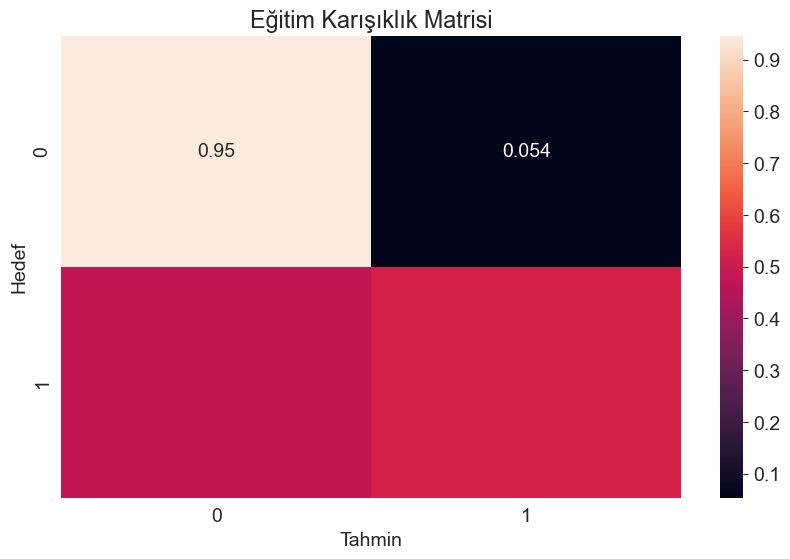

In [648]:
train_pred = predict_and_plot(X_train, train_targets, 'Eğitim')

In [668]:
def random_guess(inputs):
  return np.random.choice(["No", "Yes"], len(inputs))

In [669]:
def all_no(inputs):
  return np.full(len(inputs), "No")

In [675]:
accuracy_score(test_targets,random_guess(X_test))

0.5002722676001555

In [674]:
accuracy_score(test_targets, all_no(X_test))

0.7734344612991054

In [ ]:
new_input = {
'Date': '2021-06-19',
'Location': 'Katherine',
'MinTemp': 23.2,
'MaxTemp': 33.2,
'Rainfall': 10.2,
'Evaporation': 4.2,
'Sunshine': np.nan,
'WindGustDir': 'NNW',
'WindGustSpeed': 52.0,
'WindDir9am': 'NW',
'WindDir3pm': 'NNE',
'WindSpeed9am': 13.0,
'WindSpeed3pm': 20.0,
'Humidity9am': 89.0,
'Humidity3pm': 58.0,
'Pressure9am': 1004.8,
'Pressure3pm': 1001.5,
'Cloud9am': 8.0,
'Cloud3pm': 5.0,
'Temp9am': 25.7,
'Temp3pm': 33.0,
'RainToday': 'Yes'
}